<a href="https://colab.research.google.com/github/Shuvamjoy34/NumberCrunchers/blob/master/Bankruptcy_ML_Modelling_with_feature_engineered_dataset_with_PCA_and_Oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Packages Details


import pandas as pd
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import csv
from scipy import stats
# from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer

from numpy import loadtxt

from sklearn.metrics import accuracy_score

from sklearn import metrics
import csv
from matplotlib import pyplot

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
import warnings

from sklearn.metrics import roc_auc_score

import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler,NearMiss,CondensedNearestNeighbour,EditedNearestNeighbours
from imblearn.combine import SMOTEENN,SMOTETomek
from sklearn.model_selection import KFold, train_test_split
#from imblearn.ensemble import EasyEnsemble
from sklearn.ensemble import BaggingClassifier,VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
!pip install catboost
from catboost import CatBoostClassifier
import lightgbm as lgb
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
!pip install squarify
import squarify


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error,f1_score,log_loss
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline
from sklearn import preprocessing, metrics
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import os
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler,NearMiss,CondensedNearestNeighbour,EditedNearestNeighbours
from imblearn.combine import SMOTEENN,SMOTETomek
from sklearn.model_selection import KFold, train_test_split
#from imblearn.ensemble import EasyEnsemble
from sklearn.ensemble import BaggingClassifier,VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import squarify

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 66.1MB 59kB/s 


In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Bankruptcy_Data.csv to Bankruptcy_Data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['Bankruptcy_Data.csv']))
df

index  Tobin's Q       EPS  Liquidity  Profitability  Productivity  \
0          0  -0.076615  0.012760   0.068040       0.105082      0.091033   
1          1  -0.076658  0.001862   0.066431       0.105038      0.089449   
2          2  -0.076592  0.009325   0.068353       0.105122      0.091627   
3          3  -0.076043  0.008499   0.066431       0.104227      0.089151   
4          4  -0.076191  0.008628   0.066789       0.104367      0.089250   
...      ...        ...       ...        ...            ...           ...   
23315  23315  -0.076679  0.024144   0.066516       0.105113      0.090488   
23316  23316  -0.076706  0.001493   0.064532       0.105058      0.090211   
23317  23317  -0.076719  0.013442   0.064335       0.105038      0.090003   
23318  23318  -0.076436  0.012107   0.066999       0.105024      0.091082   
23319  23319  -0.075699  0.008618   0.067848       0.104798      0.088785   

       Leverage Ratio  Asset Turnover  Operational Margin  Return on Equity  \
0            0.130167        1.170599            0.331174         -0.004952   
1            0.173874        0.595065            0.330931         -0.006108   
2            0.032121        1.074677            0.331309         -0.004900   
3            0.078191       -0.527227            0.305995         -0.005740   
4            0.153792       -0.527227            0.194827         -0.005451   
...               ...             ...                 ...               ...   
23315        0.098154       -0.111883            0.331455         -0.003754   
23316        0.166078       -0.180947            0.331339         -0.007474   
23317        0.153202       -0.190539            0.331188         -0.002118   
23318        0.025269       -0.197254            0.332044         -0.005157   
23319       -0.021864       -0.438978            0.328129         -0.005428   

       Market Book Ratio  Assets Growth  Sales Growth  Employee Growth  \
0               0.002483      -0.030656     -0.064848         0.817138   
1               0.002617      -0.031700     -0.126702         0.897458   
2               0.002457      -0.030656     -0.064848         0.897458   
3               0.002742      -0.033372     -0.227872        -0.385408   
4               0.002769      -0.028658     -0.097598        -0.109291   
...                  ...            ...           ...              ...   
23315           0.003139      -0.025227     -0.055077        -0.096920   
23316           0.002691      -0.030386     -0.100725        -0.286858   
23317           0.002555      -0.032389     -0.115446        -0.041342   
23318           0.003492      -0.035035     -0.097598        -0.168480   
23319           0.004979      -0.035035     -0.097598        -0.168480   

       Liquidity + Profitability  BK + Liquidity  Asset Turnover + Tobin's Q  \
0                       0.106462        0.068007                   -0.076141   
1                       0.106232        0.066399                   -0.076417   
2                       0.106536        0.068320                   -0.076156   
3                       0.105472        0.066399                   -0.076257   
4                       0.105645        0.066756                   -0.076405   
...                          ...             ...                         ...   
23315                   0.106312        0.066483                   -0.076725   
23316                   0.106028        0.064499                   -0.076781   
23317                   0.105987        0.068772                   -0.076797   
23318                   0.106285        0.066966                   -0.076517   
23319                   0.106173        0.067815                   -0.075878   

       BK + Productivity  Liquidity + Productivity  EPS + Operational Margin  \
0               0.090960                  0.089444                  0.238353   
1               0.089376                  0.087539                  0.230297   
2               0.091554                  0

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [ ]:
# Dropping the Target for X
X=df.drop(['BK'],axis=1).values
X

array([[ 0.00000000e+00, -7.66148660e-02,  1.27600830e-02, ...,
         2.89079562e-01, -3.83965100e-02, -1.05292750e-02],
       [ 1.00000000e+00, -7.66576850e-02,  1.86183000e-03, ...,
         2.37291691e-01, -3.83977560e-02, -3.03441480e-02],
       [ 2.00000000e+00, -7.65915110e-02,  9.32532500e-03, ...,
         7.36017310e-02, -3.83973670e-02, -4.62443100e-03],
       ...,
       [ 2.33170000e+04, -7.67187990e-02,  1.34418700e-02, ...,
         3.10870230e-02, -3.84026740e-02, -3.22375100e-02],
       [ 2.33180000e+04, -7.64358070e-02,  1.21067040e-02, ...,
        -2.32720860e-02, -3.83847250e-02, -3.07907520e-02],
       [ 2.33190000e+04, -7.56985510e-02,  8.61771400e-03, ...,
        -4.42783020e-02, -3.83189270e-02, -3.14589000e-02]])

In [ ]:
X.shape

(23320, 209)

In [ ]:
# Including only the Target for y
y=df['BK'].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y.shape

(23320,)

In [ ]:
#Splitting the Training and Testing data having 20% of Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify = y)
X_train, X_test, y_train, y_test

(array([[ 5.49900000e+03, -7.65915110e-02,  1.26309570e-02, ...,
          1.83432871e-01, -3.83661550e-02, -3.12938320e-02],
        [ 1.03880000e+04, -7.62100370e-02,  5.37406300e-03, ...,
          2.69717622e-01, -3.86183770e-02, -3.02270470e-02],
        [ 3.46500000e+03, -7.61866820e-02,  8.73134500e-03, ...,
          2.57571700e-02, -3.83902620e-02, -1.02289250e-02],
        ...,
        [ 1.91260000e+04, -7.66693630e-02,  8.62804400e-03, ...,
         -4.48394440e-02, -3.83778960e-02, -3.00979890e-02],
        [ 7.21100000e+03, -7.54042720e-02,  8.47309200e-03, ...,
         -4.48394440e-02, -3.80843320e-02, -3.08776470e-02],
        [ 7.33000000e+02, -7.66966110e-02,  3.84045520e-02, ...,
         -3.59031640e-02, -3.83975600e-02, -8.81044700e-03]]),
 array([[ 3.82500000e+03, -7.66615780e-02,  7.85328700e-03, ...,
         -4.48394440e-02, -3.83477980e-02, -3.28623620e-02],
        [ 1.82310000e+04, -7.49877650e-02,  3.33386900e-03, ...,
         -4.48394440e-02, -3.84730910e

In [ ]:

Counter(y_train)

Counter({0: 18520, 1: 136})

In [ ]:
Counter(y_test)

Counter({0: 4630, 1: 34})

In [ ]:
#Nearmiss Sampling
Nm = NearMiss(ratio= 0.5,version=3,n_neighbors=3,random_state=234)
X_train_res, y_train_res = Nm.fit_sample(X_train, y_train.ravel())

In [ ]:
Cnn = CondensedNearestNeighbour(random_state=234)
X_train_res, y_train_res = Cnn.fit_sample(X_train, y_train)

In [ ]:
ENN = EditedNearestNeighbours(random_state=234)
X_train_res, y_train_res = ENN.fit_sample(X_train, y_train)

In [ ]:
SENN = SMOTEENN(ratio= 0.6,random_state=42)
X_train_res, y_train_res = SENN.fit_sample(X_train, y_train)

In [ ]:
X_train_res, y_train_res

(array([[ 5.49900000e+03, -7.65915110e-02,  1.26309570e-02, ...,
          1.83432871e-01, -3.83661550e-02, -3.12938320e-02],
        [ 1.03880000e+04, -7.62100370e-02,  5.37406300e-03, ...,
          2.69717622e-01, -3.86183770e-02, -3.02270470e-02],
        [ 3.46500000e+03, -7.61866820e-02,  8.73134500e-03, ...,
          2.57571700e-02, -3.83902620e-02, -1.02289250e-02],
        ...,
        [ 2.29222229e+04, -7.63783469e-02,  6.77926151e-03, ...,
          3.04640824e-02, -3.83855612e-02, -3.02089591e-02],
        [ 2.32365126e+04, -7.33718553e-02,  8.27905726e-03, ...,
         -4.48394440e-02, -3.85392276e-02, -3.15473324e-02],
        [ 1.07488574e+04, -7.43754005e-02,  6.31074907e-03, ...,
         -3.07818414e-01, -3.83969392e-02, -3.01992701e-02]]),
 array([0, 0, 0, ..., 1, 1, 1]))

In [ ]:
pd.Series(y_train_res).value_counts().sort_index() #values after SMOTE

0    18518
1    11110
dtype: int64

In [ ]:
Counter(y_train_res)

Counter({0: 18518, 1: 11110})

In [ ]:
# check how balanced the training set is
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train_res))

Resampled dataset shape Counter({0: 18518, 1: 11110})


In [ ]:
features = df.columns
features

Index(['index', 'Tobin's Q', 'EPS', 'Liquidity', 'Profitability',
       'Productivity', 'Leverage Ratio', 'Asset Turnover',
       'Operational Margin', 'Return on Equity', 'Market Book Ratio',
       'Assets Growth', 'Sales Growth', 'Employee Growth',
       'Liquidity + Profitability', 'BK + Liquidity',
       'Asset Turnover + Tobin's Q', 'BK + Productivity',
       'Liquidity + Productivity', 'EPS + Operational Margin',
       'Assets Growth + Liquidity', 'Employee Growth + Productivity',
       'Asset Turnover + Return on Equity', 'Assets Growth + Productivity',
       'Assets Growth + Sales Growth', 'Return on Equity + Tobin's Q',
       'Liquidity + Return on Equity', 'Operational Margin + Sales Growth',
       'Assets Growth + Profitability', 'Productivity + Return on Equity',
       'Employee Growth + Profitability', 'Market Book Ratio + Sales Growth',
       'Assets Growth + Market Book Ratio', 'Productivity + Tobin's Q',
       'Market Book Ratio + Productivity',
       'Le

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


In [ ]:
from sklearn.decomposition import PCA
pca_bankruptcy = PCA(n_components=2)
principalComponents_bankruptcy = pca_bankruptcy.fit_transform(X)
principalComponents_bankruptcy


array([[ 1.16595001e+04, -7.22123286e-01],
       [ 1.16585001e+04, -6.84320436e-01],
       [ 1.16575001e+04, -7.14904856e-01],
       ...,
       [-1.16575002e+04, -7.39827648e-01],
       [-1.16585000e+04, -6.60447507e-01],
       [-1.16595000e+04, -6.41058967e-01]])

In [ ]:
principal_bankruptcy_df = pd.DataFrame(data = principalComponents_bankruptcy
             , columns = ['principal component 1', 'principal component 2'])
principal_bankruptcy_df.tail()

principal component 1  principal component 2
23315          -11655.499985              -0.684381
23316          -11656.499994              -0.653493
23317          -11657.500189              -0.739828
23318          -11658.499992              -0.660448
23319          -11659.499996              -0.641059

In [ ]:
print('Explained variation per principal component: {}'.format(pca_bankruptcy.explained_variance_ratio_))

Explained variation per principal component: [9.99995411e-01 5.57102505e-07]


<Figure size 432x288 with 0 Axes>

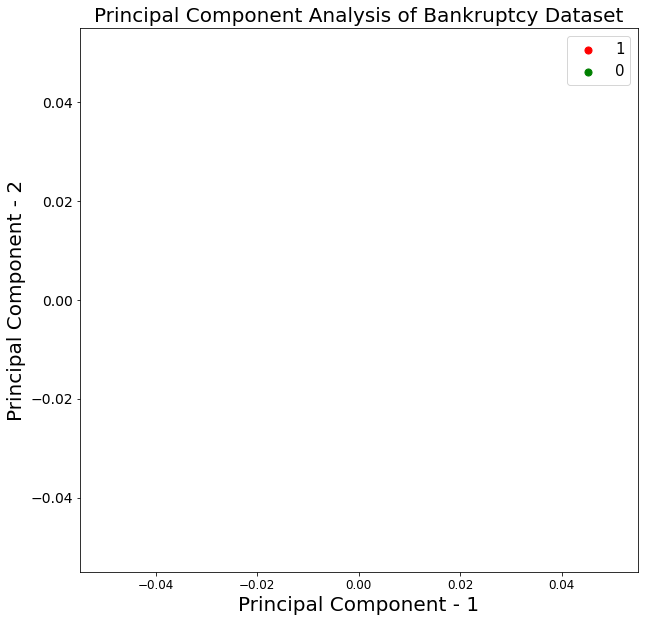

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Bankruptcy Dataset",fontsize=20)
targets = ['1', '0']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['BK'] == target
    plt.scatter(principal_bankruptcy_df.loc[indicesToKeep, 'principal component 1']
               , principal_bankruptcy_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

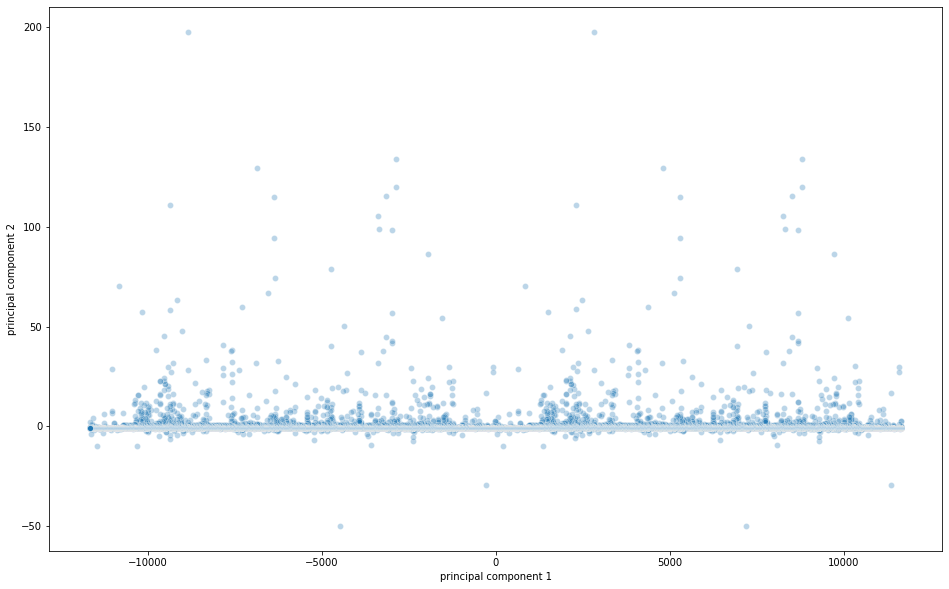

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_bankruptcy_df,
    legend="full",
    alpha=0.3
)

In [ ]:
#mean_vec = np.mean(X, axis=0) 
#cov_mat = (X - mean_vec).T.dot((X - mean_vec)) / (X.shape[0]-1) 
#print('Covariance matrix \n%s' %cov_mat) 
print('Covariance matrix \n') 
cov_mat= np.cov(X, rowvar=False) 
cov_mat

Covariance matrix 



array([[ 4.53204767e+07,  6.62495069e+01, -4.89340748e+01, ...,
        -1.63674819e+01,  1.22948560e+01, -3.36216089e+01],
       [ 6.62495069e+01,  1.00004288e+00,  6.57719282e-04, ...,
        -3.82924725e-03,  7.59076965e-01,  6.04695584e-02],
       [-4.89340748e+01,  6.57719282e-04,  1.00004288e+00, ...,
        -2.29647816e-02,  3.31787262e-04,  2.55218347e-04],
       ...,
       [-1.63674819e+01, -3.82924725e-03, -2.29647816e-02, ...,
         1.00004288e+00, -3.06389957e-03, -1.46761609e-03],
       [ 1.22948560e+01,  7.59076965e-01,  3.31787262e-04, ...,
        -3.06389957e-03,  1.00004288e+00,  2.17515672e-01],
       [-3.36216089e+01,  6.04695584e-02,  2.55218347e-04, ...,
        -1.46761609e-03,  2.17515672e-01,  1.00004288e+00]])

In [ ]:
cov_mat = np.cov(X.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.00000000e+00+0.00000000e+00j -3.35918155e-06+0.00000000e+00j
  -4.55794319e-06+0.00000000e+00j ...  5.49820223e-17+2.44747887e-16j
   5.49820223e-17-2.44747887e-16j  1.97890598e-17+0.00000000e+00j]
 [-1.46180123e-06+0.00000000e+00j  9.54021084e-02+0.00000000e+00j
  -4.84887447e-02+0.00000000e+00j ...  1.38198617e-02+3.40369672e-02j
   1.38198617e-02-3.40369672e-02j -2.05290620e-01+0.00000000e+00j]
 [ 1.07973479e-06+0.00000000e+00j -2.58757160e-02+0.00000000e+00j
  -2.02555360e-01+0.00000000e+00j ...  5.91086465e-03-2.53612403e-02j
   5.91086465e-03+2.53612403e-02j  2.84795848e-02+0.00000000e+00j]
 ...
 [ 3.61149863e-07+0.00000000e+00j -2.29841613e-03+0.00000000e+00j
   6.21258920e-03+0.00000000e+00j ...  3.85850809e-12+3.27340607e-12j
   3.85850809e-12-3.27340607e-12j -9.96611338e-12+0.00000000e+00j]
 [-2.71287363e-07+0.00000000e+00j  7.14104275e-02+0.00000000e+00j
  -3.96601041e-02+0.00000000e+00j ... -2.49705160e-11-7.63902947e-12j
  -2.49705160e-11+7.63902947e-12j

In [ ]:
#Make a list of (eigenvalue, eigenvector) tuples 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) 
for i in range(len(eig_vals))] 
    #print(type(eig_pairs)) 
#Sort the (eigenvalue, eigenvector) tuples from high to low eig_pairs.sort() 
eig_pairs.reverse() 
print("\n",eig_pairs) 
#Visually confirm that the list is correctly sorted by decreasing eigenvalues 
print('\n\n\nEigenvalues in descending order:') 
for i in eig_pairs: 
    print(i[0])


 [(4.958000697981529e-16, array([ 1.97890598e-17+0.j, -2.05290620e-01+0.j,  2.84795848e-02+0.j,
       -2.05382133e-02+0.j, -5.58772463e-02+0.j, -3.29537892e-02+0.j,
       -4.94874537e-02+0.j, -8.29506487e-05+0.j, -1.97353367e-02+0.j,
        3.01461971e-02+0.j, -4.59250247e-02+0.j,  7.70350884e-02+0.j,
        1.99176065e-03+0.j,  1.66537387e-02+0.j, -1.18556691e-01+0.j,
       -7.32335173e-03+0.j,  2.37537042e-03+0.j, -1.03586010e-01+0.j,
        2.76874133e-02+0.j, -4.90295212e-02+0.j, -2.50058526e-02+0.j,
       -8.60505323e-02+0.j, -4.25505441e-02+0.j,  6.78346946e-02+0.j,
        1.12431936e-01+0.j,  2.64307434e-01+0.j,  8.47748133e-02+0.j,
       -2.59159186e-02+0.j,  1.19050979e-01+0.j, -3.68116179e-02+0.j,
        2.55276882e-02+0.j,  2.41707345e-02+0.j, -1.45539515e-03+0.j,
       -1.39021295e-01+0.j,  6.08165210e-02+0.j, -8.83568130e-02+0.j,
       -1.28677772e-01+0.j, -1.36962173e-01+0.j, -8.42320549e-02+0.j,
       -5.66016738e-02+0.j,  3.76117010e-01+0.j, -1.27950972e-0

In [ ]:
tot = sum(eig_vals) 
print("\n",tot) 
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
print("\n\n1. Variance Explained\n",var_exp) 
cum_var_exp = np.cumsum(var_exp) 
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp) 
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2]) 
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))


 (45320684.675586425+0j)


1. Variance Explained
 [(99.99954109370903+0j), (5.571025049517771e-05+0j), (4.012383569476125e-05+0j), (3.5560017294748524e-05+0j), (3.0233866502444914e-05+0j), (2.8437444738882988e-05+0j), (2.3134112536574903e-05+0j), (2.111350616592767e-05+0j), (1.5357372691494455e-05+0j), (1.4803543147581196e-05+0j), (1.2444720316745063e-05+0j), (1.2060985019403085e-05+0j), (1.0545864803581756e-05+0j), (8.968434935765708e-06+0j), (8.039923131016875e-06+0j), (7.184472014205135e-06+0j), (5.790247662842204e-06+0j), (5.008714984233549e-06+0j), (4.938526505002048e-06+0j), (4.75115164214991e-06+0j), (4.591814868811568e-06+0j), (4.320705310229617e-06+0j), (3.883452179910912e-06+0j), (3.6716787481261396e-06+0j), (3.484281749308123e-06+0j), (3.367908530807932e-06+0j), (3.10567538087753e-06+0j), (3.003247596077846e-06+0j), (2.9927823509847e-06+0j), (2.905761950126115e-06+0j), (2.7552795263254493e-06+0j), (2.679573384159202e-06+0j), (2.6343361627988986e-06+0j), (2.45634425659263e-0

In [ ]:
print(eig_pairs[0][1]) 
print(eig_pairs[1][1]) 
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))) 
#hstack: Stacks arrays in sequence horizontally (column wise). 
print('Matrix W:\n', matrix_w)

[ 1.97890598e-17+0.j -2.05290620e-01+0.j  2.84795848e-02+0.j
 -2.05382133e-02+0.j -5.58772463e-02+0.j -3.29537892e-02+0.j
 -4.94874537e-02+0.j -8.29506487e-05+0.j -1.97353367e-02+0.j
  3.01461971e-02+0.j -4.59250247e-02+0.j  7.70350884e-02+0.j
  1.99176065e-03+0.j  1.66537387e-02+0.j -1.18556691e-01+0.j
 -7.32335173e-03+0.j  2.37537042e-03+0.j -1.03586010e-01+0.j
  2.76874133e-02+0.j -4.90295212e-02+0.j -2.50058526e-02+0.j
 -8.60505323e-02+0.j -4.25505441e-02+0.j  6.78346946e-02+0.j
  1.12431936e-01+0.j  2.64307434e-01+0.j  8.47748133e-02+0.j
 -2.59159186e-02+0.j  1.19050979e-01+0.j -3.68116179e-02+0.j
  2.55276882e-02+0.j  2.41707345e-02+0.j -1.45539515e-03+0.j
 -1.39021295e-01+0.j  6.08165210e-02+0.j -8.83568130e-02+0.j
 -1.28677772e-01+0.j -1.36962173e-01+0.j -8.42320549e-02+0.j
 -5.66016738e-02+0.j  3.76117010e-01+0.j -1.27950972e-01+0.j
  2.45233042e-02+0.j  5.76065845e-02+0.j -9.64908311e-02+0.j
 -1.84577979e-01+0.j -2.08421355e-02+0.j  5.16987125e-02+0.j
  5.36757121e-02+0.j -1.

ValueError: ignored

In [ ]:
pca = PCA(n_components=2) 
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance. However we know from above computation that 2 components are enough so we have passed the 2 components.
principalComponents = pca.fit_transform(X) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5) # prints the top 5 rows

principal component 1  principal component 2
0           11659.500100              -0.722049
1           11658.500076              -0.684252
2           11657.500100              -0.714823
3           11656.499991              -0.541380
4           11655.499994              -0.536200

In [ ]:
df = pd.concat([principalDf, df[['BK']]], axis = 1)
df

principal component 1  principal component 2  BK
0               11659.500100              -0.722049   0
1               11658.500076              -0.684252   0
2               11657.500100              -0.714823   0
3               11656.499991              -0.541380   0
4               11655.499994              -0.536200   0
...                      ...                    ...  ..
23315          -11655.499985              -0.684387   0
23316          -11656.499994              -0.653514   0
23317          -11657.500189              -0.739824   1
23318          -11658.499992              -0.660455   0
23319          -11659.499996              -0.641067   0

[23320 rows x 3 columns]

In [ ]:
# Dropping the Target for X
X=df.drop(['BK'],axis=1).values
X

array([[ 1.16595001e+04, -7.22049359e-01],
       [ 1.16585001e+04, -6.84252154e-01],
       [ 1.16575001e+04, -7.14823134e-01],
       ...,
       [-1.16575002e+04, -7.39823686e-01],
       [-1.16585000e+04, -6.60455385e-01],
       [-1.16595000e+04, -6.41067340e-01]])

In [ ]:
X.shape

(23320, 2)

In [ ]:
# Including only the Target for y
y=df['BK'].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y.shape

(23320,)

In [ ]:
#Splitting the Training and Testing data having 20% of Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42, stratify = y)
X_train, X_test, y_train, y_test

(array([[ 6.16050001e+03, -6.56344404e-01],
        [ 1.27150000e+03, -6.48017260e-01],
        [ 8.19450005e+03, -6.49783663e-01],
        ...,
        [-7.46650000e+03, -5.92974227e-01],
        [ 4.44849998e+03, -3.38680945e-01],
        [ 1.09265001e+04, -6.74820529e-01]]),
 array([[ 7.83449996e+03, -2.21218253e-01],
        [-6.57150000e+03, -6.61053279e-01],
        [-5.46850003e+03, -3.89436499e-01],
        ...,
        [ 7.33549999e+03, -4.61202022e-01],
        [-1.01025000e+04,  1.97933222e+01],
        [-5.19950003e+03, -2.73340266e-01]]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
Counter(y_train)

Counter({0: 18520, 1: 136})

In [ ]:
Counter(y_test)

Counter({0: 4630, 1: 34})

In [ ]:
SENN = SMOTEENN(ratio= 0.6,random_state=42)
X_train_res, y_train_res = SENN.fit_sample(X_train, y_train)
X_train_res, y_train_res

(array([[ 6.16050001e+03, -6.56344404e-01],
        [ 1.27150000e+03, -6.48017260e-01],
        [ 8.19450005e+03, -6.49783663e-01],
        ...,
        [-1.14853060e+04, -7.48857431e-01],
        [-1.12676261e+04, -3.64908168e-01],
        [-1.15790107e+04, -6.78792879e-01]]), array([0, 0, 0, ..., 1, 1, 1]))

In [ ]:
pd.Series(y_train_res).value_counts().sort_index() #values after SMOTE

0    17217
1     8033
dtype: int64

In [ ]:
#Defining the confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
                      
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using Success and Failure for 0 and 1    
class_names = ['Success','Failure']


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve

In [ ]:
# Model
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [ ]:
def model_selection(X, y):
    acc_result = []
    auc_result = []
    names = []

    col = ['Model', 'ROC AUC Mean','ROC AUC Std','ACC Mean', 'ACC Std']
    result = pd.DataFrame(columns = col)

    i=0
    for name, model in models:
        kfold = KFold(n_splits = 10, random_state = 7)
        cv_acc_result  = cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')
        cv_auc_result  = cross_val_score(model, X, y, cv = kfold, scoring = 'roc_auc')

        acc_result.append(cv_acc_result)
        auc_result.append(cv_auc_result)
        names.append(name)

        result.loc[i] = [name, 
                         cv_auc_result.mean(), 
                         cv_auc_result.std(),
                         cv_acc_result.mean(),
                         cv_acc_result.std()]

        result = result.sort_values('ROC AUC Mean', ascending = False)
        i+= 1

    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    sns.boxplot(x = names, y = auc_result)
    plt.title('ROC AUC Score')

    plt.subplot(1,2,2)
    sns.boxplot(x = names, y = acc_result)
    plt.title('Accuracy Score')
    plt.show()

    return(result)

kNN Accuracy is 0.92
Cross Validation Score = 0.86
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4630
           1       0.09      0.97      0.16        34

    accuracy                           0.92      4664
   macro avg       0.54      0.95      0.56      4664
weighted avg       0.99      0.92      0.95      4664



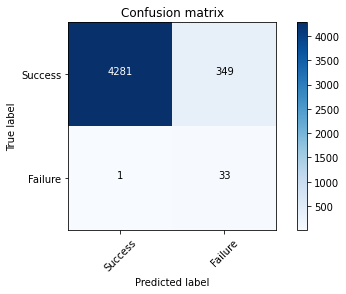

In [ ]:
# Defining the kNNClassifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)
#Fitting the classifier to the training set
knn.fit(X_train_res,y_train_res)
print ("kNN Accuracy is %2.2f" % accuracy_score(y_test, knn.predict(X_test)))
#The cross validation score is obtained for kNN using 10 folds
score_knn = cross_val_score(knn, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_knn)
y_pred= knn.predict(X_test)
print(classification_report(y_test, y_pred))
#Defining the confusion matrix
cm = confusion_matrix(y_test,y_pred)
#Plotting the confusion matrix
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [ ]:
print('Accuracy on training set:',knn.score(X_train_res,y_train_res))
print('Accuracy on test set:',knn.score(X_test,y_test))

Accuracy on training set: 0.9996831683168317
Accuracy on test set: 0.9249571183533448


Logistic Accuracy is 0.83
Cross Validation Score = 0.99
              precision    recall  f1-score   support

           0       0.99      0.83      0.91      4630
           1       0.02      0.41      0.03        34

    accuracy                           0.83      4664
   macro avg       0.51      0.62      0.47      4664
weighted avg       0.99      0.83      0.90      4664



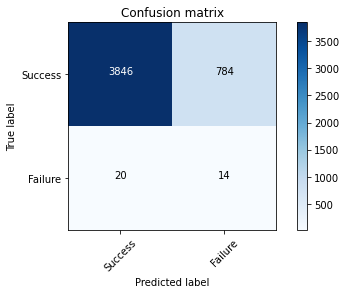

In [ ]:
#Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(X_train_res,y_train_res)
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))
score_LR = cross_val_score(LR, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_LR)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion matrix for LR
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [ ]:
print('Accuracy on training set:',LR.score(X_train_res,y_train_res))
print('Accuracy on test set:',LR.score(X_test,y_test))

Accuracy on training set: 0.7550891089108911
Accuracy on test set: 0.8276157804459692


SVM Accuracy is 0.86
Cross Validation Score = 0.93
              precision    recall  f1-score   support

           0       1.00      0.86      0.93      4630
           1       0.05      1.00      0.10        34

    accuracy                           0.86      4664
   macro avg       0.53      0.93      0.51      4664
weighted avg       0.99      0.86      0.92      4664



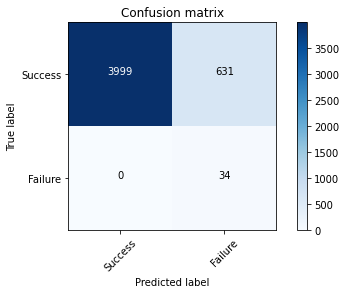

In [ ]:
#SVM Classifier
from sklearn import svm,tree
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
SVM = svm.SVC()
SVM.fit(X_train_res, y_train_res)
print ("SVM Accuracy is %2.2f" % accuracy_score(y_test, SVM.predict(X_test)))
score_svm = cross_val_score(SVM, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_svm)
y_pred = SVM.predict(X_test)
print(classification_report(y_test,y_pred))
#Confusion matrix for SVM
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [ ]:
print('Accuracy on training set:',SVM.score(X_train_res,y_train_res))
print('Accuracy on test set:',SVM.score(X_test,y_test))

Accuracy on training set: 0.9592871287128713
Accuracy on test set: 0.8647084048027445


Decision Tree Accuracy is 0.92
Cross Validation Score = 0.86
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4630
           1       0.08      0.97      0.16        34

    accuracy                           0.92      4664
   macro avg       0.54      0.95      0.56      4664
weighted avg       0.99      0.92      0.95      4664



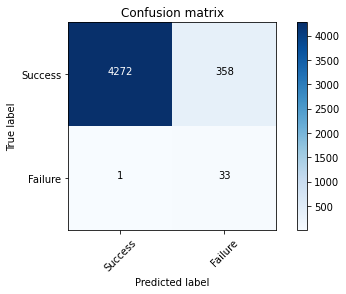

In [ ]:
# Decision Tree Classifier
DT = DecisionTreeClassifier(random_state = 0,class_weight="balanced",
    min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train_res,y_train_res)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))
score_DT = cross_val_score(DT, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_DT)
y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [ ]:
print('Accuracy on training set:',DT.score(X_train_res,y_train_res))
print('Accuracy on test set:',DT.score(X_test,y_test))

Accuracy on training set: 0.9993663366336634
Accuracy on test set: 0.9230274442538593


Random Forest Accuracy is 0.93
Cross Validation Score = 0.86
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4630
           1       0.08      0.94      0.16        34

    accuracy                           0.93      4664
   macro avg       0.54      0.93      0.56      4664
weighted avg       0.99      0.93      0.96      4664



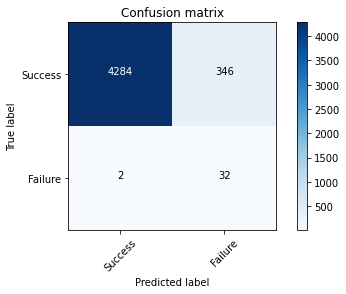

In [ ]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train_res, y_train_res)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))
score_rfc = cross_val_score(rfc, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_rfc)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))
#Confusion Matrix for Random Forest
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [ ]:
print('Accuracy on training set:',rfc.score(X_train_res,y_train_res))
print('Accuracy on test set:',rfc.score(X_test,y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.9253859348198971


AdaBoost Accuracy= 0.92
Cross Validation Score = 0.86
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      4630
           1       0.08      0.94      0.15        34

    accuracy                           0.92      4664
   macro avg       0.54      0.93      0.56      4664
weighted avg       0.99      0.92      0.95      4664



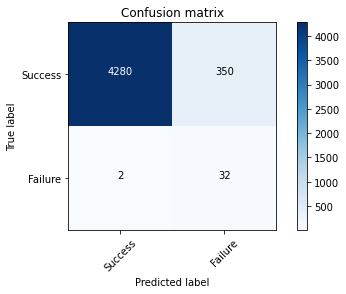

In [ ]:
#AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train_res,y_train_res)
print ("AdaBoost Accuracy= %2.2f" % accuracy_score(y_test,ada.predict(X_test)))
score_ada = cross_val_score(ada, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_ada)
y_pred = ada.predict(X_test)
print(classification_report(y_test,y_pred ))
#Confusion Marix for AdaBoost
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [ ]:
print('Accuracy on training set:',ada.score(X_train_res,y_train_res))
print('Accuracy on test set:',ada.score(X_test,y_test))

Accuracy on training set: 0.9997227722772277
Accuracy on test set: 0.9245283018867925


GradientBoost Accuracy= 0.93
Cross Validation Score = 0.86
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4630
           1       0.09      0.94      0.16        34

    accuracy                           0.93      4664
   macro avg       0.54      0.93      0.56      4664
weighted avg       0.99      0.93      0.96      4664



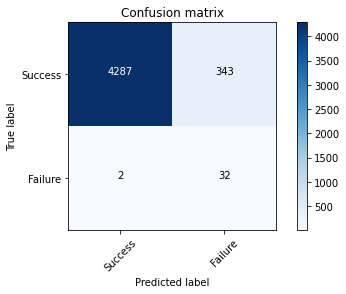

In [ ]:
#XGBoost Classifier
xgb = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
xgb.fit(X_train_res,y_train_res)
print ("GradientBoost Accuracy= %2.2f" % accuracy_score(y_test,xgb.predict(X_test)))
score_xgb = cross_val_score(xgb, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_ada)
y_pred = xgb.predict(X_test) 
print(classification_report(y_test,y_pred))
#Confusion Matrix for XGBoost Classifier
cm_xg = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm_xg, classes=class_names, title='Confusion matrix')

In [ ]:
print('Accuracy on training set:',xgb.score(X_train_res,y_train_res))
print('Accuracy on test set:',xgb.score(X_test,y_test))

Accuracy on training set: 0.9998811881188119
Accuracy on test set: 0.9260291595197255


Naive Bayes Accuracy= 0.38
Cross Validation Score = 0.86
              precision    recall  f1-score   support

           0       1.00      0.37      0.54      4630
           1       0.01      1.00      0.02        34

    accuracy                           0.38      4664
   macro avg       0.51      0.69      0.28      4664
weighted avg       0.99      0.38      0.54      4664



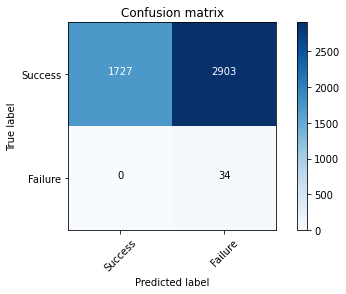

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train_res, y_train_res)
print ("Naive Bayes Accuracy= %2.2f" % accuracy_score(y_test,nb_clf.predict(X_test)))
score_nb = cross_val_score(nb_clf, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_ada)
y_pred = nb_clf.predict(X_test) 
print(classification_report(y_test,y_pred))
#Confusion Matrix for XGBoost Classifier
cm_nb = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm_nb, classes=class_names, title='Confusion matrix')

In [ ]:
print('Accuracy on training set:',nb_clf.score(X_train_res,y_train_res))
print('Accuracy on test set:',nb_clf.score(X_test,y_test))

Accuracy on training set: 0.5723960396039603
Accuracy on test set: 0.3775728987993139


In [ ]:
CAT = CatBoostClassifier(iterations = 100,learning_rate = 0.05,depth = 10,l2_leaf_reg = 0.5,eval_metric = 'F1',)
CAT.fit(X_train_res, y_train_res)

preds = CAT.predict(X_train_res)
	# Train data accuracy of model with best params
print('train set accuracy score for best params: %.3f ' % f1_score(y_train_res, preds))

y_pred = CAT.predict(X_test)
	# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % f1_score(y_test, y_pred))

0:	learn: 0.9897010	total: 68.8ms	remaining: 6.81s
1:	learn: 0.9897010	total: 82.5ms	remaining: 4.04s
2:	learn: 0.9921005	total: 95.8ms	remaining: 3.1s
3:	learn: 0.9924101	total: 109ms	remaining: 2.62s
4:	learn: 0.9924092	total: 123ms	remaining: 2.33s
5:	learn: 0.9897010	total: 136ms	remaining: 2.13s
6:	learn: 0.9897010	total: 150ms	remaining: 1.99s
7:	learn: 0.9923465	total: 164ms	remaining: 1.88s
8:	learn: 0.9915904	total: 177ms	remaining: 1.79s
9:	learn: 0.9924700	total: 190ms	remaining: 1.71s
10:	learn: 0.9930262	total: 209ms	remaining: 1.69s
11:	learn: 0.9935162	total: 218ms	remaining: 1.6s
12:	learn: 0.9908693	total: 231ms	remaining: 1.55s
13:	learn: 0.9930262	total: 245ms	remaining: 1.5s
14:	learn: 0.9935162	total: 259ms	remaining: 1.47s
15:	learn: 0.9930262	total: 276ms	remaining: 1.45s
16:	learn: 0.9903810	total: 289ms	remaining: 1.41s
17:	learn: 0.9927171	total: 302ms	remaining: 1.38s
18:	learn: 0.9931498	total: 316ms	remaining: 1.35s
19:	learn: 0.9931507	total: 329ms	remaini

In [ ]:
print('Accuracy on training set:',CAT.score(X_train_res,y_train_res))
print('Accuracy on test set:',CAT.score(X_test,y_test))

Accuracy on training set: 0.9977821782178218
Accuracy on test set: 0.9221698113207547


In [ ]:
# Time for Classification Models
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Naive Bayes": GaussianNB()
}

In [ ]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train_res, y_train_res, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train_res, y_train_res)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train_res, y_train_res)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [ ]:
df_results = batch_classify(X_train_res, y_train_res)
print(df_results.sort_values(by='train_score', ascending=False))

trained Logistic Regression in 0.37 s
trained Nearest Neighbors in 0.10 s
trained Linear SVM in 3.31 s
trained Gradient Boosting Classifier in 2.19 s
trained Decision Tree in 0.03 s
trained Random Forest in 0.27 s
trained Naive Bayes in 0.00 s
                     classifier  train_score  training_time
3  Gradient Boosting Classifier     1.000000       2.187906
4                 Decision Tree     1.000000       0.025023
5                 Random Forest     0.999921       0.267706
1             Nearest Neighbors     0.999683       0.099261
2                    Linear SVM     0.959287       3.308812
0           Logistic Regression     0.755089       0.369736
6                   Naive Bayes     0.572396       0.004642


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting_clf2 = VotingClassifier(
 estimators=[('rfc', rfc),('ada', ada),('CAT', CAT),('xgb',xgb)],
 voting='soft')
voting_clf2

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight='balanced',
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=10,
                                                     min_weight_fraction_leaf=0.0,


In [ ]:
voting_clf2.fit(X_train_res, y_train_res)

0:	learn: 0.9897010	total: 13.9ms	remaining: 1.38s
1:	learn: 0.9897010	total: 27.7ms	remaining: 1.36s
2:	learn: 0.9921005	total: 41.5ms	remaining: 1.34s
3:	learn: 0.9924101	total: 55ms	remaining: 1.32s
4:	learn: 0.9924092	total: 68.2ms	remaining: 1.29s
5:	learn: 0.9897010	total: 81.5ms	remaining: 1.28s
6:	learn: 0.9897010	total: 94.9ms	remaining: 1.26s
7:	learn: 0.9923465	total: 108ms	remaining: 1.24s
8:	learn: 0.9915904	total: 121ms	remaining: 1.23s
9:	learn: 0.9924700	total: 135ms	remaining: 1.21s
10:	learn: 0.9930262	total: 148ms	remaining: 1.2s
11:	learn: 0.9935162	total: 155ms	remaining: 1.14s
12:	learn: 0.9908693	total: 168ms	remaining: 1.12s
13:	learn: 0.9930262	total: 181ms	remaining: 1.11s
14:	learn: 0.9935162	total: 194ms	remaining: 1.1s
15:	learn: 0.9930262	total: 207ms	remaining: 1.09s
16:	learn: 0.9903810	total: 231ms	remaining: 1.13s
17:	learn: 0.9927171	total: 246ms	remaining: 1.12s
18:	learn: 0.9931498	total: 261ms	remaining: 1.11s
19:	learn: 0.9931507	total: 275ms	rema

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight='balanced',
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=10,
                                                     min_weight_fraction_leaf=0.0,


In [ ]:
voting_clf2.score(X_test, y_test)

0.9256003430531733

In [ ]:
voting_clf2.score(X_train_res, y_train_res)

0.9998811881188119

Ensemble Accuracy= 0.93
0:	learn: 0.0000000	total: 9.54ms	remaining: 944ms
1:	learn: 0.0000000	total: 22.6ms	remaining: 1.11s
2:	learn: 0.0000000	total: 35ms	remaining: 1.13s
3:	learn: 0.0000000	total: 47.6ms	remaining: 1.14s
4:	learn: 0.0000000	total: 60.6ms	remaining: 1.15s
5:	learn: 0.0000000	total: 73.3ms	remaining: 1.15s
6:	learn: 0.0000000	total: 86.2ms	remaining: 1.14s
7:	learn: 0.0000000	total: 99.2ms	remaining: 1.14s
8:	learn: 0.0000000	total: 112ms	remaining: 1.13s
9:	learn: 0.0000000	total: 125ms	remaining: 1.12s
10:	learn: 0.0000000	total: 138ms	remaining: 1.11s
11:	learn: 0.0000000	total: 151ms	remaining: 1.11s
12:	learn: 0.0000000	total: 164ms	remaining: 1.09s
13:	learn: 0.0000000	total: 176ms	remaining: 1.08s
14:	learn: 0.0000000	total: 190ms	remaining: 1.07s
15:	learn: 0.0000000	total: 203ms	remaining: 1.06s
16:	learn: 0.0000000	total: 212ms	remaining: 1.04s
17:	learn: 0.0000000	total: 232ms	remaining: 1.06s
18:	learn: 0.0000000	total: 245ms	remaining: 1.04s
19:	learn: 

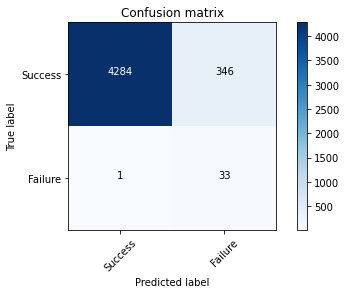

In [ ]:
print ("Ensemble Accuracy= %2.2f" % accuracy_score(y_test,voting_clf2.predict(X_test)))
score_vc = cross_val_score(voting_clf2, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_vc)
y_pred = voting_clf2.predict(X_test) 
print(classification_report(y_test,y_pred))
#Confusion Matrix for XGBoost Classifier
cm_vc = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm_vc, classes=class_names, title='Confusion matrix')

In [ ]:
# best classifier Random Forest
best_classifier_vot = (VotingClassifier([('rfc', rfc),('xgb',xgb),('ada',ada),('CAT',CAT)], voting='soft', weights=None, n_jobs=None, flatten_transform=True))

In [ ]:
# function for fitting the model
def fit_model(best_classifier, bank_note_data, X_test, y_test):
    # fit classifier
    cols = df.columns[0:-1]
    best_estim = best_classifier.fit(X_test, y_test)
    # cross validation score
    scores = cross_val_score(best_classifier, X_test, y_test, cv=10, scoring="roc_auc")
    print("CV Mean:",scores.mean())
    return best_estim

In [ ]:
# training the data for Random Forest model
best_estim_vot = fit_model(best_classifier_vot,df, X_test, y_test)

0:	learn: 0.0000000	total: 3.21ms	remaining: 318ms
1:	learn: 0.0000000	total: 11.2ms	remaining: 550ms
2:	learn: 0.0000000	total: 19.1ms	remaining: 618ms
3:	learn: 0.0000000	total: 27ms	remaining: 648ms
4:	learn: 0.0000000	total: 35.1ms	remaining: 666ms
5:	learn: 0.0000000	total: 43.6ms	remaining: 684ms
6:	learn: 0.0000000	total: 56.2ms	remaining: 747ms
7:	learn: 0.0000000	total: 66.3ms	remaining: 763ms
8:	learn: 0.0000000	total: 74.2ms	remaining: 751ms
9:	learn: 0.0000000	total: 91ms	remaining: 819ms
10:	learn: 0.0000000	total: 99.1ms	remaining: 802ms
11:	learn: 0.0000000	total: 107ms	remaining: 787ms
12:	learn: 0.0000000	total: 115ms	remaining: 771ms
13:	learn: 0.0000000	total: 123ms	remaining: 755ms
14:	learn: 0.0000000	total: 130ms	remaining: 739ms
15:	learn: 0.0000000	total: 138ms	remaining: 724ms
16:	learn: 0.0000000	total: 142ms	remaining: 694ms
17:	learn: 0.0000000	total: 155ms	remaining: 708ms
18:	learn: 0.0000000	total: 163ms	remaining: 696ms
19:	learn: 0.0000000	total: 171ms	

In [ ]:
# function for prediction
def prediction(best_estim, X_test):
    # train classifier and predict
    X_predicted = best_estim.predict(X_test)
    X_prob_pred = best_estim.predict_proba(X_test)[::,1]

    return X_predicted, X_prob_pred

In [ ]:
# predicting on test data Random Forest model
X_predicted_vot, X_prob_pred_vot = prediction(best_estim_vot, X_test)
X_predicted_vot, X_prob_pred_vot

# function for performance measurement
def performance_measure(X_test, X_predicted, X_prob_pred):    

    # plotting the ROC curve
    fpr, tpr, thresholds = roc_curve(X_test,X_prob_pred)
    plt.plot(fpr, tpr, c="dimgrey",label="voting classifier")
    plt.plot([0, 1], [0, 1], c="cornflowerblue", linestyle='--', label="voting guess classifier")
    plt.title("ROC Curve of voting Classifier")
    plt.xlabel("False Positive Rate - Specificity")
    plt.ylabel("True Positive Rate - Sensitivity")
    plt.legend()
    plt.grid(True)
    plt.show()
        
    # AUC
    auc = round(roc_auc_score(X_test, X_predicted),2)
    print("AUC:",auc)
    return auc

In [ ]:
X_predicted_vot, X_prob_pred_vot

(array([0, 0, 0, ..., 0, 0, 0]),
 array([0.09731763, 0.11074213, 0.1123172 , ..., 0.10283687, 0.10722565,
        0.11238139]))

In [ ]:
preds = voting_clf2.predict(X_train_res)
	# Train data accuracy of model 
print('Test set accuracy score for voting Ensemble: %.3f ' % f1_score(y_train_res, preds))

y_pred = voting_clf2.predict(X_test)
	# Test data accuracy of model 
print('Test set accuracy score for voting Ensemble: %.3f ' % f1_score(y_test, y_pred))

Test set accuracy score for voting Ensemble: 1.000 
Test set accuracy score for voting Ensemble: 0.160 


In [ ]:
y_pred1 = voting_clf2.predict(X_test)
y_pred1

NameError: ignored

In [ ]:
x = y_pred1
x

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df = pd.DataFrame(x,columns=['prediction'])
X_test=pd.DataFrame(X_test)
df['ID'] = X_test.index
df = df[['ID','prediction']]
df

ID  prediction
0        0           0
1        1           0
2        2           0
3        3           0
4        4           0
5        5           0
6        6           0
7        7           0
8        8           0
9        9           0
10      10           0
11      11           0
12      12           0
13      13           0
14      14           0
15      15           0
16      16           0
17      17           0
18      18           0
19      19           0
20      20           0
21      21           0
22      22           0
23      23           1
24      24           0
25      25           0
26      26           0
27      27           0
28      28           0
29      29           0
30      30           0
31      31           0
32      32           0
33      33           0
34      34           0
35      35           0
36      36           0
37      37           0
38      38           0
39      39           0
40      40           0
41      41           0
42      42           0
43      43           0
44      44           0
45      45           0
46      46           0
47      47           0
48      48           0
49      49           0
50      50           1
51      51           0
52      52           0
53      53           0
54      54           0
55      55           0
56      56           0
57      57           0
58      58           0
59      59           0
60      60           0
61      61           0
62      62           0
63      63           0
64      64           0
65      65           0
66      66           0
67      67           0
68      68           0
69      69           0
70      70           0
71      71           0
72      72           0
73      73           0
74      74           0
75      75           0
76      76           0
77      77           0
78      78           0
79      79           0
80      80           0
81      81           0
82      82           0
83      83           0
84      84           0
85      85           0
86      86           0
87      87           0
88      88           0
89      89           1
90      90           0
91      91           0
92      92           0
93      93           0
94      94           0
95      95           0
96      96           0
97      97           0
98      98           0
99      99           0
100    100           0
101    101           0
102    102           0
103    103           0
104    104           0
105    105           0
106    106           0
107    107           0
108    108           0
109    109           0
110    110           0
111    111           0
112    112           0
113    113           0
114    114           0
115    115           0
116    116           0
117    117           0
118    118           0
119    119           0
120    120           0
121    121           1
122    122           0
123    123           1
124    124           0
125    125           0
126    126           0
127    127           0
128    128           0
129    129           0
130    130           1
131    131           0
132    132           0
133    133           0
134    134           0
135    135           0
136    136           0
137    137           0
138    138           0
139    139           0
140    140           0
141    141           0
142    142           0
143    143           0
144    144           0
145    145           0
146    146           0
147    147           0
148    148           0
149    149           0
150    150           0
151    151           0
152    152           0
153    153           0
154    154           0
155    155           0
156    156           0
157    157           0
158    158           0
159    159           0
160    160           0
161    161           0
162    162           0
163    163           0
164    164           0
165    165           0
166    166           0
167    167           0
168    168           0
169    169           0
170    170           0
171    171           0
172    172           0
173   

In [ ]:
my_df=df
my_df

ID  prediction
0        0           0
1        1           0
2        2           0
3        3           0
4        4           0
5        5           0
6        6           0
7        7           0
8        8           0
9        9           0
10      10           0
11      11           0
12      12           0
13      13           0
14      14           0
15      15           0
16      16           0
17      17           0
18      18           0
19      19           0
20      20           0
21      21           0
22      22           0
23      23           1
24      24           0
25      25           0
26      26           0
27      27           0
28      28           0
29      29           0
30      30           0
31      31           0
32      32           0
33      33           0
34      34           0
35      35           0
36      36           0
37      37           0
38      38           0
39      39           0
40      40           0
41      41           0
42      42           0
43      43           0
44      44           0
45      45           0
46      46           0
47      47           0
48      48           0
49      49           0
50      50           1
51      51           0
52      52           0
53      53           0
54      54           0
55      55           0
56      56           0
57      57           0
58      58           0
59      59           0
60      60           0
61      61           0
62      62           0
63      63           0
64      64           0
65      65           0
66      66           0
67      67           0
68      68           0
69      69           0
70      70           0
71      71           0
72      72           0
73      73           0
74      74           0
75      75           0
76      76           0
77      77           0
78      78           0
79      79           0
80      80           0
81      81           0
82      82           0
83      83           0
84      84           0
85      85           0
86      86           0
87      87           0
88      88           0
89      89           1
90      90           0
91      91           0
92      92           0
93      93           0
94      94           0
95      95           0
96      96           0
97      97           0
98      98           0
99      99           0
100    100           0
101    101           0
102    102           0
103    103           0
104    104           0
105    105           0
106    106           0
107    107           0
108    108           0
109    109           0
110    110           0
111    111           0
112    112           0
113    113           0
114    114           0
115    115           0
116    116           0
117    117           0
118    118           0
119    119           0
120    120           0
121    121           1
122    122           0
123    123           1
124    124           0
125    125           0
126    126           0
127    127           0
128    128           0
129    129           0
130    130           1
131    131           0
132    132           0
133    133           0
134    134           0
135    135           0
136    136           0
137    137           0
138    138           0
139    139           0
140    140           0
141    141           0
142    142           0
143    143           0
144    144           0
145    145           0
146    146           0
147    147           0
148    148           0
149    149           0
150    150           0
151    151           0
152    152           0
153    153           0
154    154           0
155    155           0
156    156           0
157    157           0
158    158           0
159    159           0
160    160           0
161    161           0
162    162           0
163    163           0
164    164           0
165    165           0
166    166           0
167    167           0
168    168           0
169    169           0
170    170           0
171    171           0
172    172           0
173   

In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
my_df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

In [ ]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train_res, y_train_res, cv=10)
log_reg_mean = log_scores.mean()
log_reg_mean 

0.7503762376237624

In [ ]:
# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train_res, y_train_res, cv=5)
tree_mean = tree_scores.mean()
# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train_res, y_train_res, cv=5)
grad_mean = grad_scores.mean()
grad_mean

0.9997623762376238

In [ ]:
tree_mean

0.9994851485148516

In [ ]:
# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train_res, y_train_res, cv=5)
rand_mean = rand_scores.mean()
rand_mean

0.9996039603960396

In [ ]:
# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Dec Tree', 'Grad B CLF', 'Rand FC'], 
    'Crossval Mean Scores': [log_reg_mean,tree_mean,grad_mean,rand_mean]}

result_df = pd.DataFrame(data=d)
result_df

Classifiers  Crossval Mean Scores
0  Logistic Reg.              0.750376
1       Dec Tree              0.999485
2     Grad B CLF              0.999762
3        Rand FC              0.999604

In [ ]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

Classifiers  Crossval Mean Scores
2     Grad B CLF              0.999762
3        Rand FC              0.999604
1       Dec Tree              0.999485
0  Logistic Reg.              0.750376

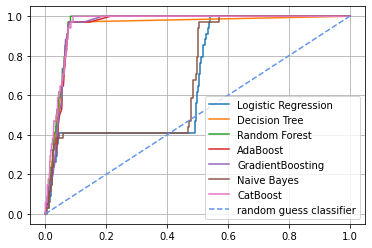

In [ ]:
#fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
#SVM_fpr, SVM_tpr, thresholds = roc_curve(y_test, SVM.predict_proba(X_test)[:,1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, thresholds = roc_curve(y_test, nb_clf.predict_proba(X_test)[:,1])
CAT_fpr, CAT_tpr, thresholds = roc_curve(y_test, CAT.predict_proba(X_test)[:,1])


#vcra_fpr, vcra_tpr, thresholds = roc_curve(y_test,voting_clf2.predict_proba(X_test)[:,1])
#vcrxg_fpr, vcrxg_tpr, thresholds = roc_curve(y_test,voting_clf21.predict_proba(X_test)[:,1])
#PLotting ROC Curves for all classifiers
#plt.plot(fpr, tpr, label='KNN' )
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression')
#plt.plot(SVM_fpr, SVM_tpr, label='SVM')
plt.plot(DT_fpr, DT_tpr, label='Decision Tree')
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest')
plt.plot(ada_fpr, ada_tpr, label='AdaBoost')
plt.plot(xgb_fpr, xgb_tpr, label='GradientBoosting')
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes')
plt.plot(CAT_fpr, CAT_tpr, label='CatBoost')
#plt.plot(vcra_fpr, vcra_tpr, label='EmsembleRAda')
#plt.plot(vcrxg_fpr, vcrxg_tpr, label='EmsembleRXg')
plt.plot([0, 1], [0, 1], c="cornflowerblue", linestyle='--', label="random guess classifier")
plt.legend()
plt.grid(True)
plt.show()
#plt.title("ROC Curve of all Classifiers")
#plt.xlabel("False Positive Rate - Specificity")
#plt.ylabel("True Positive Rate - Sensitivity")

In [ ]:
# Cross validate our Random Forest Classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rfc, X_train_res, y_train_res, cv=10)
y_train_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
rfc.fit(X_train_res, y_train_res)
print ("Random Forest Classifier accuracy is %2.2f" % accuracy_score(y_train_res, y_train_pred))

Random Forest Classifier accuracy is 1.00


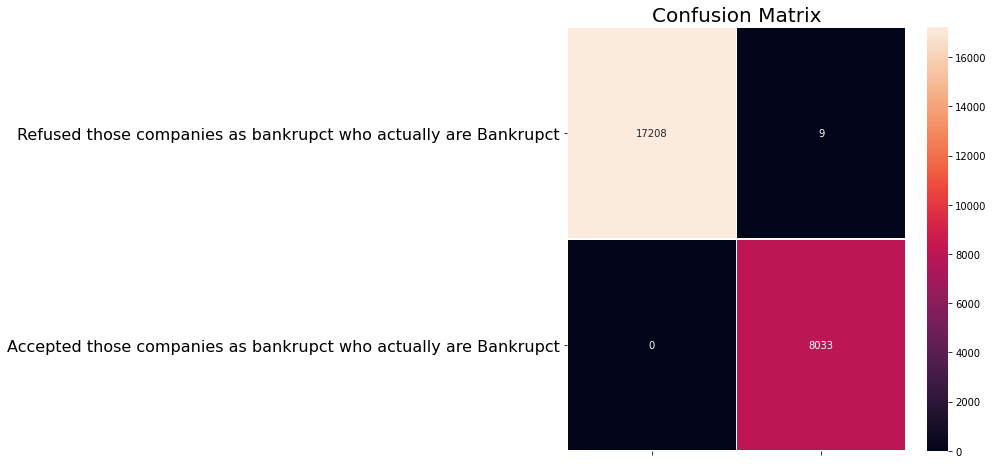

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train_res, y_train_pred)
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused those companies as bankrupct who actually are Bankrupct', 'Accepted those companies as bankrupct who actually are Bankrupct'], fontsize=16, rotation=360)
plt.show()


In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score

print('Precision Score: ', precision_score(y_train_res, y_train_pred))

print('Recall Score: ', recall_score(y_train_res, y_train_pred))

Precision Score:  0.9988808754041283
Recall Score:  1.0


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_res, y_train_pred)

0.9994401244167962

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import svm,tree
from datetime import datetime

In [ ]:
# Cross validate our Random Forest Classifier
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rfc, X_train_res, y_train_res, cv=10)
y_train_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# Using Recursive Feature Elimination Function and fitting it in a Logistic Regression Model
modell = RandomForestClassifier()
rfe = RFE(modell, 5)
rfe = rfe.fit(X_train_res,y_train_res)
# Displays the feature rank
rfe.ranking_

# Using ExtraTreesClassifier model function
model = ExtraTreesClassifier()
model.fit(X_train_res, y_train_res)
# Printing important features in the model
print(model.feature_importances_)
importances = model.feature_importances_
feat_names = df.drop(['BK'],axis=1).columns

# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

[0.95441123 0.04558877]


KeyError: ignored

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing imports
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, power_transform
from sklearn.model_selection import train_test_split

# classifier imports
from sklearn.ensemble import RandomForestClassifier

# additional imports
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import SelectFromModel

# performance measure imports
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

%matplotlib inline

In [ ]:
# best classifier Random Forest
best_classifier_ranfor = (RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False))

In [ ]:
# function for fitting the model
def fit_model(best_classifier, df, X_train_res, y_train_res):
    # fit classifier
    cols = df.columns[0:-1]
    best_estim = best_classifier.fit(X_train_res, y_train_res)
    # cross validation score
    scores = cross_val_score(best_classifier, X_train_res, y_train_res, cv=5, scoring="roc_auc")
    print("CV Mean:",scores.mean())
    return best_estim

In [ ]:
# training the data for Random Forest model
best_estim_ranfor = fit_model(best_classifier_ranfor, df, X_train_res, y_train_res)

ValueError: ignored

In [ ]:
# feature importance random forest
def feature_importance(best_estim):
    cols = df.columns[0:-1]
    feat_imp_output = pd.DataFrame({"feature":cols,
                                    "importance": best_estim.feature_importances_})
    return feat_imp_output

In [ ]:
# feature importance output
feat_imp_output = feature_importance(best_estim_ranfor)
feat_imp_output.sort_values(by=["importance"], ascending=False)


NameError: ignored

In [ ]:
# function for prediction
def prediction(best_estim, X_test, y_test):
    # train classifier and predict
    y_test_predicted = best_estim.predict(X_test)
    y_test_prob_pred = best_estim.predict_proba(X_test)[::,1]

    return y_test_predicted, y_test_prob_pred

In [ ]:
# predicting on test data Random Forest model
y_test_predicted_ranfor, y_test_prob_pred_ranfor = prediction(best_estim_ranfor, X_test, y_test)
y_test_predicted_ranfor, y_test_prob_pred_ranfor

# function for performance measurement
def performance_measure(y_test, y_test_predicted, y_test_prob_pred):    

    # plotting the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_pred)
    plt.plot(fpr, tpr, c="dimgrey",label="random forest classifier")
    plt.plot([0, 1], [0, 1], c="cornflowerblue", linestyle='--', label="random guess classifier")
    plt.title("ROC Curve of Random Forest Classifier")
    plt.xlabel("False Positive Rate - Specificity")
    plt.ylabel("True Positive Rate - Sensitivity")
    plt.legend()
    plt.grid(True)
    plt.show()
        
    # AUC
    auc = round(roc_auc_score(y_test, y_test_predicted),2)
    print("AUC:",auc)
    return auc

NameError: ignored

In [ ]:
# performance measure Random Forest
performance_measure(y_test, y_test_predicted_ranfor, y_test_prob_pred_ranfor)

NameError: ignored

In [ ]:
# function for confusion matrix with individual decision-threshold
def confusion(y_test, y_test_prob_pred, threshold):
    
    predicted = (y_test_prob_pred >= threshold).astype('int')
    conf = confusion_matrix(y_test, predicted)
    plt.figure(figsize=(7,5))
    sns.heatmap(pd.DataFrame(conf), annot=True, cmap="Blues" ,fmt='g')
    plt.xlabel("predicted values")
    plt.ylabel("actual values")
    plt.title("Confusion Matrix for a {} decision-threshold".format(threshold))
    plt.show()
    
    TP = conf[1,1]
    TN = conf[0,0]
    FP = conf[0,1]
    FN = conf[1,0]
        
    # sensitivity/ recall_score
    print("Sensitivity:", TP/float(TP+FN)) 
       
    # specificity
    print("Specificity:", TN/float(TN+FP))

    
# confusion matrix for 0.8 decision-threshold
confusion(y_test, y_test_prob_pred_ranfor, 0.5)

NameError: ignored

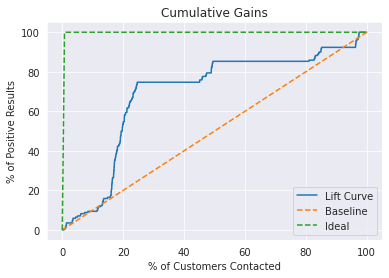

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")
y_proba = cross_val_predict(rfc, X, y, cv=10, n_jobs=-1, method='predict_proba')
results = pd.DataFrame({'y': y, 'y_proba': y_proba[:,1]})
results = results.sort_values(by='y_proba', ascending=False).reset_index(drop=True)
results.index = results.index + 1
results.index = results.index / len(results.index) * 100

sns.set_style('darkgrid')
pred = results
pred['Lift Curve'] = pred.y.cumsum() / pred.y.sum() * 100
pred['Baseline'] = pred.index
base_rate = y.sum() / len(y) * 100
pred[['Lift Curve', 'Baseline']].plot(style=['-', '--', '--'])
pd.Series(data=[0, 100, 100], index=[0, base_rate, 100]).plot(style='--')
plt.title('Cumulative Gains')
plt.xlabel('% of Customers Contacted')
plt.ylabel("% of Positive Results")
plt.legend(['Lift Curve', 'Baseline', 'Ideal']);